<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/NewMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 3.5 MB/s eta 0:00:00


In [2]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
df=pd.read_excel("/content/pv_04.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [5]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	15
R

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=141,
                                         random_state=RandomState(MT19937) at 0x7F21F40DDA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F21F40DDA40, verbose=2)

In [6]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [7]:
inputs1

<KerasTensor: shape=(None, 2, 18) dtype=float32 (created by layer 'input_1')>

In [8]:
from keras import optimizers

In [9]:
opt=optimizers.Adam(learning_rate=0.001)

In [10]:
from keras.layers import Bidirectional

In [11]:
def define_model():



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
model=define_model()


"history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)\nimport matplotlib.pyplot as plt\nplt.plot(history.history['loss'], label='train')\nplt.plot(history.history['val_loss'], label='val')\nplt.legend()\nplt.show()\ny=mdl.predict(X_test)\nplt.scatter(y,y_test)\nplt.show()\ndf = pd.DataFrame()\ndf['time']=[i for i in range(len(y))]\ndf['Actual']=y_test\ndf['Predicted']=y\nplt.plot(df['time'],df['Actual'])\nplt.plot(df['time'],df['Predicted'])\nplt.show()\nprint(np.sqrt(mean_squared_error(y,y_test)))"

In [13]:
from keras.models import clone_model
from keras.optimizers import Adam

In [15]:
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)
current_loss = model.evaluate(X_train, y_train)
distance = [np.linalg.norm(b - i) for b, i in zip(model.best_weights, model.initial_weights)]
distance = sum(distance)/len(distance)
# Initialize the best parameters
best_params = None
best_loss = np.inf
num_restarts=20
model_=model
for i in range(num_restarts):
    
    # Update best parameters and loss
    if current_loss < best_loss:
        best_loss = current_loss
        best_params = model_.get_weights()
        
    # Add noise to the best parameters
    params_1 =[b + 2*distance for b in model_.best_weights]
    model1=clone_model(model)
    model1.set_weights(params_1)
    optimizer_1 = Adam(params_1, lr=0.001,beta_1=0.9, beta_2=0.999)
    model1.compile(optimizer=optimizer_1, loss='mean_squared_error')
    model1.fit(X_train, y_train, epochs=100, batch_size=32)
    current_loss1 = model1.evaluate(X_train, y_train)
    # subtract noise to the best parameters
    params_2 =[b + 2*distance for b in model_.best_weights]
    model2=clone_model(model)
    model2.set_weights(params_2)
    optimizer_2 = Adam(params_2, lr=0.001,beta_1=0.9, beta_2=0.999)
    model2.compile(optimizer=optimizer_2, loss='mean_squared_error')
    model2.fit(X_train, y_train, epochs=100, batch_size=32)
    current_loss2 = model2.evaluate(X_train, y_train)
    if current_loss1<current_loss2:
      model_=model1
      current_loss=current_loss1
    else:
      model_=model2
      current_loss=current_loss2


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


127/127 [==============================] - 14s 23ms/step - loss: 0.0148
Epoch 2/100
127/127 [==============================] - 4s 33ms/step - loss: 0.0071
Epoch 3/100
127/127 [==============================] - 3s 22ms/step - loss: 0.0050
Epoch 4/100
127/127 [==============================] - 3s 25ms/step - loss: 0.0047
Epoch 5/100
127/127 [==============================] - 3s 26ms/step - loss: 0.0043
Epoch 6/100
127/127 [==============================] - 3s 22ms/step - loss: 0.0038
Epoch 7/100
127/127 [==============================] - 3s 22ms/step - loss: 0.0037
Epoch 8/100
127/127 [==============================] - 4s 32ms/step - loss: 0.0036
Epoch 9/100
127/127 [==============================] - 3s 23ms/step - loss: 0.0035
Epoch 10/100
127/127 [==============================] - 3s 22ms/step - loss: 0.0034
Epoch 11/100
127/127 [==============================] - 3s 22ms/step - loss: 0.0033
Epoch 12/100
127/127 [==============================] - 3s 22ms/step - loss: 0.0032
Epoch 13/100

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Initialize the best parameters
best_params = None
best_loss = np.inf
num_restarts=20
for i in range(num_restarts):
    # Fit the model with current parameters
    model.fit(X_train, y_train, epochs=100, batch_size=32)
    current_loss = model.evaluate(X_train, y_train)
    
    # Update best parameters and loss
    if current_loss < best_loss:
        best_loss = current_loss
        best_params = model.get_weights()
        
    # Add noise to the best parameters
    distance = [np.linalg.norm(b - i) for b, i in zip(self.best_weights, self.initial_weights)]
    distance = sum(distance)/len(distance)
    params_1 =[b + 2*distance for b in self.best_weights]
    model.set_weights(params_1)
    
    # subtract noise to the best parameters
    params_2 = [b - 2*distance for b in self.best_weights]
    optimizer_2 = Adam(params_2, lr=self.lr, betas=self.betas)
    model.set_weights(params_2)


Epoch 1/75
51/51 [==============================] - 21s 85ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2/75
51/51 [==============================] - 2s 48ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3/75
51/51 [==============================] - 2s 48ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/75
51/51 [==============================] - 3s 49ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/75
51/51 [==============================] - 3s 50ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 6/75
51/51 [==============================] - 3s 50ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/75
51/51 [==============================] - 2s 48ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 8/75
51/51 [==============================] - 2s 48ms/step - loss: 0.0034 - 

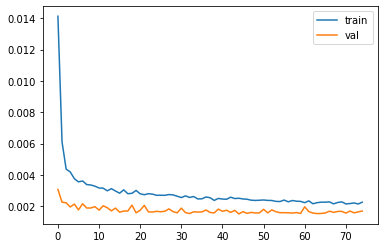

63/63 [==============================] - 2s 8ms/step


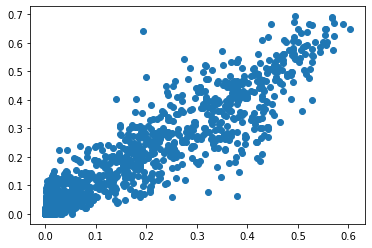

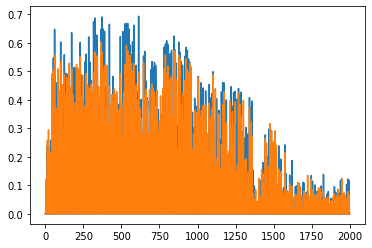

0.05556552171034254


In [ ]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))